In [71]:
import py3r.behaviour as py3r

In [72]:
from py3r.behaviour.util import three_d_utils as td

In [73]:
import os
os.getcwd()

'/Users/user/Desktop/FOKUS-PROJEKT/3d_stuff'

In [74]:
td.extract_calibration_images("C:/Users/admin/Desktop/2024 FP data/03.03.2025/calibration_camera-1.avi", "C:/Users/admin/Desktop/2024 FP data/03.03.2025/calibration_camera-2.avi", "./left_output","./right_output", chessboard_size = (8,6),
min_sharpness=0,
max_anisotropy=10000,
min_edge_density=0.000001)

OpenCV: Couldn't read video stream from file "C:/Users/admin/Desktop/2024 FP data/03.03.2025/calibration_camera-1.avi"
OpenCV: Couldn't read video stream from file "C:/Users/admin/Desktop/2024 FP data/03.03.2025/calibration_camera-2.avi"


ValueError: Not enough frames in the videos to extract 200 images.

In [ ]:
td.calibrate_stereo_system("./left_output","./right_output",(8,6),0.03, "./calibration.json")

Calibration saved to ./calibration.json with views: left_output, right_output


In [75]:
from py3r.behaviour.tracking.tracking import LoadOptions as opt

options = opt(fps=30)

In [76]:
import json

with open('calibration.json') as f:
    calibration = json.load(f)

In [77]:
from py3r.behaviour.tracking.tracking_mv import TrackingMV as mv

test = mv.from_yolo3r({"left_output":"oft_tracking/Empty_Cage/Empty_Cage_Left/1_Empty_Cage_Left_Sync.csv", "right_output":"oft_tracking/Empty_Cage/Empty_Cage_Right/1_Empty_Cage_Right_Sync.csv"},"1_Empty_Cage_multiview",
                      options,calibration)

In [78]:
test.calibration

{'views': {'left_output': {'K': [[1258.4939885943727, 0.0, 655.3579291157758],
    [0.0, 1258.2801290096213, 509.1000476008892],
    [0.0, 0.0, 1.0]],
   'dist': [[-0.5515009811671181,
     0.5781636665271928,
     -0.001643548714124342,
     0.0037264487542169136,
     -0.40246624215916277]]},
  'right_output': {'K': [[1258.4939885943727, 0.0, 655.3579291157758],
    [0.0, 1258.2801290096213, 509.1000476008892],
    [0.0, 0.0, 1.0]],
   'dist': [[-0.5515009811671181,
     0.5781636665271928,
     -0.001643548714124342,
     0.0037264487542169136,
     -0.40246624215916277]]}},
 'relative_pose': {'R': [[0.9987219358926075,
    -0.0007670268613101093,
    -0.050536189376686386],
   [-0.0009897220653084478, 0.999396310897444, -0.034728003323152366],
   [0.0505323185412635, 0.03473363549030636, 0.9981182592000162]],
  'T': [[11.991812240469235], [0.6439511868380962], [1.239601519329197]]},
 'image_size': [1280, 1024],
 'view_order': ['left_output', 'right_output']}

In [79]:
test3d = test.stereo_triangulate()


In [80]:
test3d.data.head()

,oft_3d.oft_3d_0.bl.x,oft_3d.oft_3d_0.bl.y,oft_3d.oft_3d_0.bl.z,oft_3d.oft_3d_0.bl.likelihood,mouse_top.mouse_top_0.hipl.x,mouse_top.mouse_top_0.hipl.y,mouse_top.mouse_top_0.hipl.z,mouse_top.mouse_top_0.hipl.likelihood,mouse_top.mouse_top_0.tailtip.x,mouse_top.mouse_top_0.tailtip.y,...,mouse_top.mouse_top_0.hipr.z,mouse_top.mouse_top_0.hipr.likelihood,mouse_top.mouse_top_0.tailbase.x,mouse_top.mouse_top_0.tailbase.y,mouse_top.mouse_top_0.tailbase.z,mouse_top.mouse_top_0.tailbase.likelihood,mouse_top.mouse_top_0.earr.x,mouse_top.mouse_top_0.earr.y,mouse_top.mouse_top_0.earr.z,mouse_top.mouse_top_0.earr.likelihood
frame,,,,,,,,,,,,,,,,,,,,,
0,-12.691904,8.130167,-39.662663,0.593689,-3.369111,-0.634645,-39.940948,0.990868,-5.254699,-3.813727,...,-39.823196,0.991660,-4.168034,-1.209164,-40.272961,0.996973,-3.354022,0.757436,-39.198807,0.955978
1,-12.820238,8.301777,-40.029804,0.554937,-3.345030,-0.649570,-40.035324,0.986213,-5.271811,-3.801921,...,-39.828449,0.982737,-4.148322,-1.222522,-40.206238,0.991170,-3.437767,0.726186,-39.485485,0.947386
2,-12.798316,8.261558,-39.985592,0.552241,-3.322074,-0.667130,-40.176029,0.994684,-5.245333,-3.776474,...,-39.798447,0.993301,-4.115750,-1.227598,-40.146427,0.994142,-3.547476,0.646108,-40.173813,0.987677
3,-12.797227,8.251948,-39.971657,0.552694,-3.304535,-0.671159,-40.133759,0.995407,-5.219857,-3.816592,...,-39.862801,0.994313,-4.088741,-1.258357,-40.254684,0.993935,-3.728678,0.534665,-39.913300,0.996328
4,-12.803179,8.287708,-39.965820,0.552936,-3.301585,-0.674985,-40.125671,0.995498,-5.226665,-3.831262,...,-39.943195,0.994559,-4.083255,-1.271878,-40.232937,0.993917,-3.870338,0.401776,-39.551277,0.999238


In [81]:
test3dcol = py3r.TrackingCollection.from_yolo3r_folder("/Users/user/Desktop/FOKUS-PROJEKT/3d_stuff/oft_tracking/Empty_Cage/collection_test/",options,py3r.TrackingMV)

Scanning /Users/user/Desktop/FOKUS-PROJEKT/3d_stuff/oft_tracking/Empty_Cage/collection_test/ for recordings...
  Checking /Users/user/Desktop/FOKUS-PROJEKT/3d_stuff/oft_tracking/Empty_Cage/collection_test/.DS_Store...
    Not a directory, skipping.
  Checking /Users/user/Desktop/FOKUS-PROJEKT/3d_stuff/oft_tracking/Empty_Cage/collection_test/video_1_3dset...


In [82]:
test3dcol_tri = test3dcol.stereo_triangulate()

In [83]:
test3dcol_tri.strip_column_names()

{'video_1_3dset': None}

In [84]:
test3dcol_tri.get_point_names()

{'video_1_3dset': ['top_tl',
  'earl',
  'br',
  'bcl',
  'bodycentre',
  'tailcentre',
  'tl',
  'top_br',
  'tailtip',
  'tr',
  'tailbase',
  'headcentre',
  'hipr',
  'bl',
  'bcr',
  'hipl',
  'earr',
  'top_tr',
  'top_bl',
  'neck',
  'nose']}

In [85]:
test3dcol_tri.rescale_by_known_distance("tl","br",0.64,dims = ("x","y","z"))

{'video_1_3dset': None}


Collection: <function BaseCollection.__getattr__.<locals>.batch_method at 0x17d82a2a0>


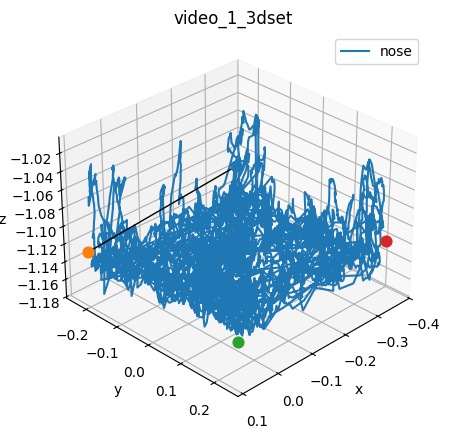

In [86]:
test3dcol_tri.plot(trajectories=["nose"], static=["tl", "tr", "br", "bl"], lines = [("tl", "tr")], dims=("x", "y", "z"))